In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



## Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insuarance_dataset = pd.read_csv('./insurance.csv')

In [3]:
# First 5 rows of the dataframe
insuarance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Last 5 rows of the dataframe
insuarance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# number of rows and columns
insuarance_dataset.shape

(1338, 7)

In [6]:
# Getting some information about the dataset
insuarance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Checking for missing values
insuarance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [8]:
# Statistical Measures of the dataset
insuarance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Ahamed Minhaj\AppData\Local\Temp\ipykernel_9036\1555441863.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset['age'])


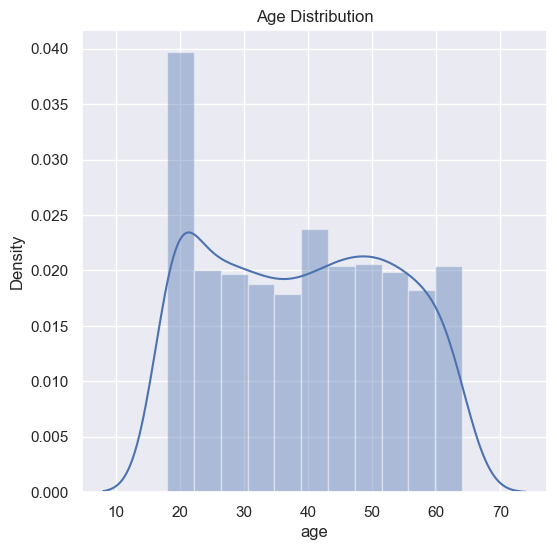

In [9]:
# Distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insuarance_dataset['age'])
plt.title('Age Distribution')
plt.show()

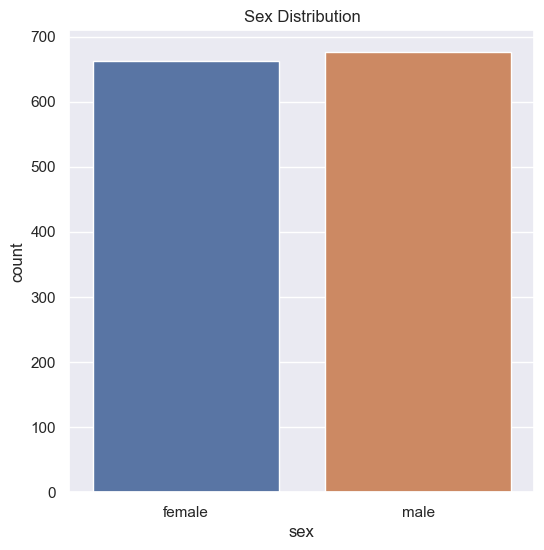

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insuarance_dataset)
plt.title('Sex Distribution')
plt.show()

In [11]:
insuarance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Ahamed Minhaj\AppData\Local\Temp\ipykernel_9036\2912223900.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset['bmi'])


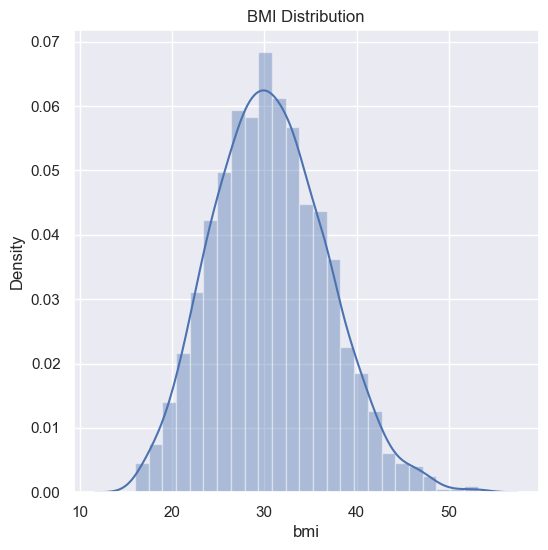

In [12]:
#bmi Distribution
plt.figure(figsize=(6,6))
sns.distplot(insuarance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

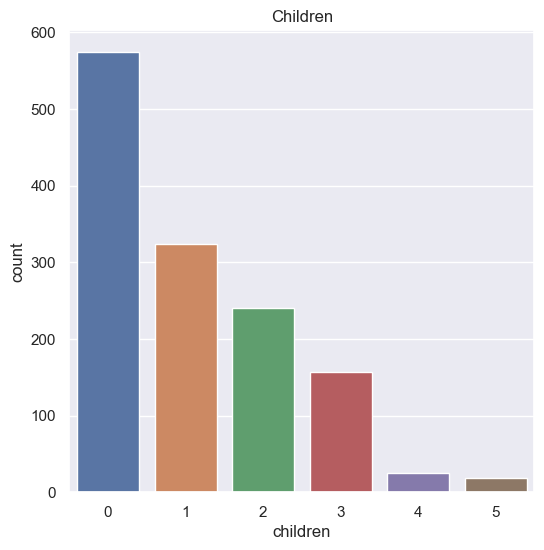

In [13]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insuarance_dataset)
plt.title('Children')
plt.show()

Text(0.5, 1.0, 'Number of Childrens Distribution')

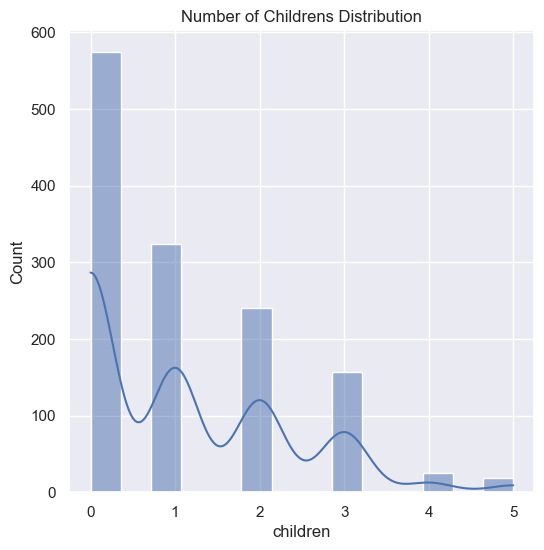

In [14]:
plt.figure(figsize=(6,6))
sns.histplot(data=insuarance_dataset, x='children', kde=True)
plt.title('Number of Childrens Distribution')

In [15]:
insuarance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

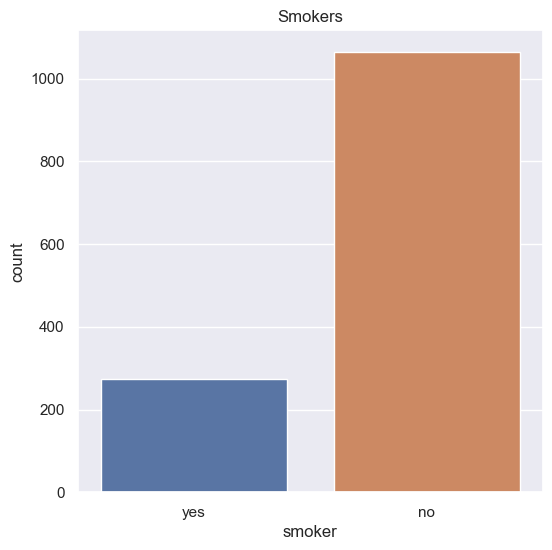

In [16]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insuarance_dataset)
plt.title('Smokers')
plt.show()

In [17]:
insuarance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

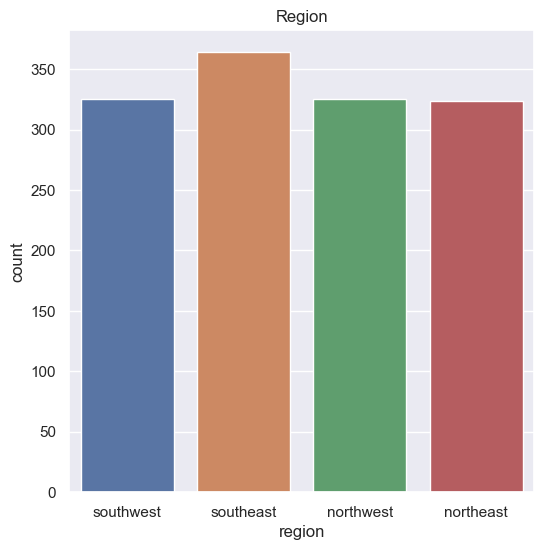

In [18]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insuarance_dataset)
plt.title('Region')
plt.show()

In [19]:
insuarance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Ahamed Minhaj\AppData\Local\Temp\ipykernel_9036\407409850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuarance_dataset['charges'])


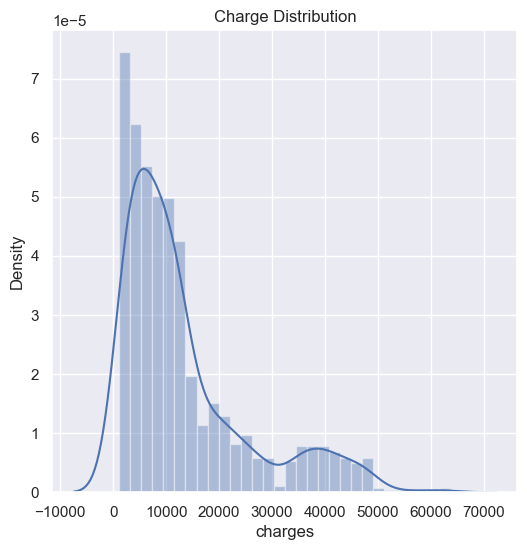

In [20]:
# Distribution of charges values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insuarance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

### Relation between each categorical column and charges column


In [21]:
# list each of Categorical and Numerical columns
categorical_columns = insuarance_dataset.select_dtypes(include=object).columns.tolist()
numerical_columns = insuarance_dataset.select_dtypes(exclude=object).columns.tolist()

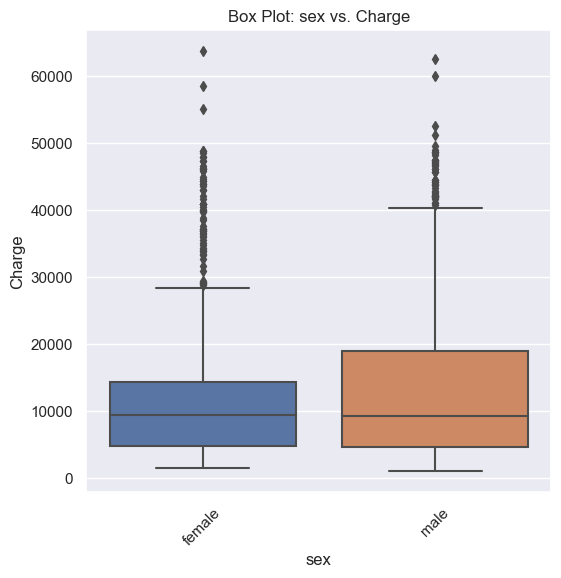

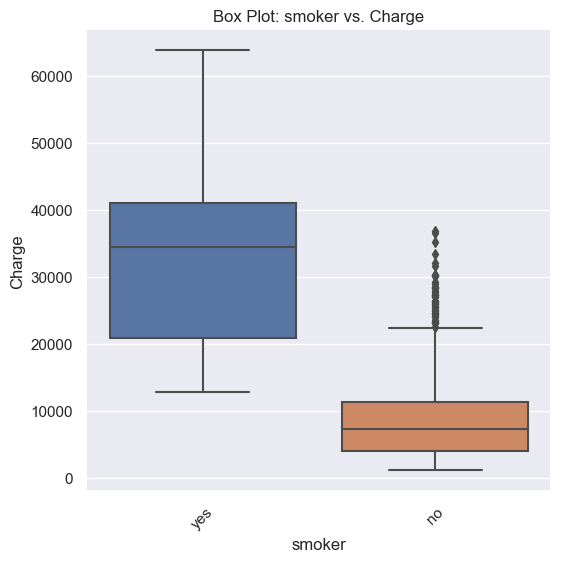

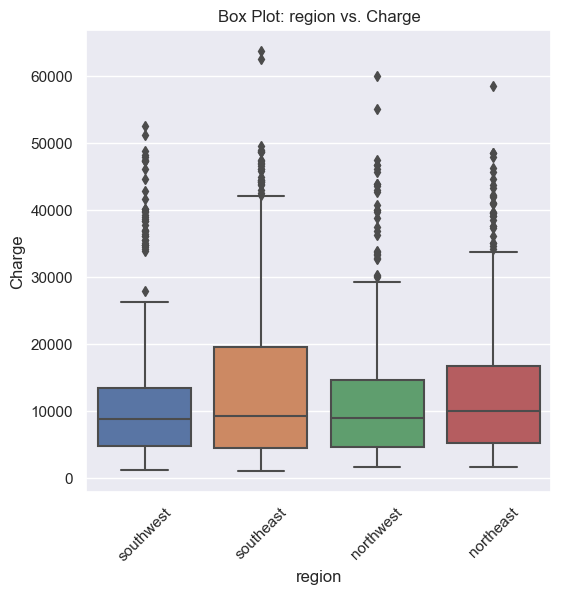

In [22]:
# Create box plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=column, y='charges', data=insuarance_dataset)
    plt.title(f'Box Plot: {column} vs. Charge')
    plt.xlabel(column)
    plt.ylabel('Charge')
    plt.xticks(rotation=45)
    plt.show()

### Relationship Between Numerical Data And Charge

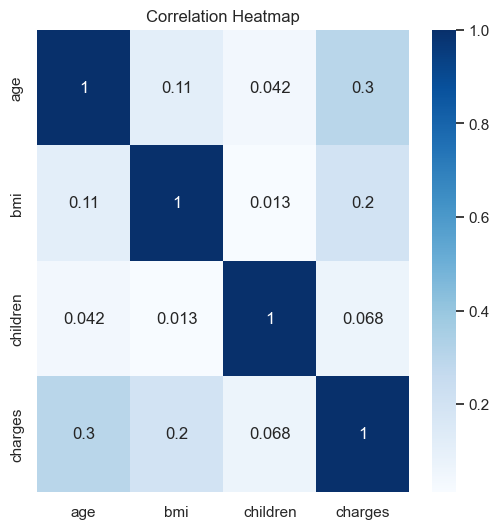

In [23]:
correlation_matrix = insuarance_dataset[numerical_columns].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In our data set we don't have null values so we don't need to eliminate any null values

we want to encode sex, smoker and region columns. 

In [24]:
# Encoding sex column
insuarance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding smoker column
insuarance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# Encoding region column
insuarance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [25]:
# showing encoded dataset table
insuarance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## Splitting the Features and Target

In [26]:
# Setting inputs and output
X = insuarance_dataset.drop(columns='charges', axis=1)
Y = insuarance_dataset['charges']

In [27]:
print(X) #Input dataset

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(Y) #output

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Splitting the data into Training data & Testing Data

In [29]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape) # Showing train, test data column and row count

(1338, 6) (1070, 6) (268, 6)


## Loading Linear Regression

In [31]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Fitting our input and output traing dataset

LinearRegression()

## Model Evaluation

In [32]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [33]:
# R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value: ',r2_train)

R squared value:  0.751505643411174


In [34]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [35]:
# R Squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :', r2_test)

R squared value : 0.7447273869684077


## Building a Predictive System

In [36]:
input_data = (31,1,25.74,0,1,0)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Linear_Regression_prediction = regressor.predict(input_data_reshaped)



C:\Users\Ahamed Minhaj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
print(Linear_Regression_prediction)

[3760.0805765]


## Descision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree_regressor = DecisionTreeRegressor(random_state = 0)
Decision_Tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
# combine the predicted values 
print(np.concatenate((test_data_prediction.reshape(len(test_data_prediction),1), test_data_prediction.reshape(len(test_data_prediction),1)),1))

[[ 1520.59242161  1520.59242161]
 [11570.5920178  11570.5920178 ]
 [10082.43849883 10082.43849883]
 [ 2246.21754312  2246.21754312]
 [ 7881.28362035  7881.28362035]
 [11081.50227956 11081.50227956]
 [ 3538.24791808  3538.24791808]
 [  698.03224036   698.03224036]
 [12223.4851558  12223.4851558 ]
 [ 9611.93217623  9611.93217623]
 [11657.51046259 11657.51046259]
 [ 4891.0539656   4891.0539656 ]
 [29947.50192274 29947.50192274]
 [ -370.8384887   -370.8384887 ]
 [12401.36048618 12401.36048618]
 [13243.21522903 13243.21522903]
 [ 3814.42216541  3814.42216541]
 [ 7883.39384825  7883.39384825]
 [29431.34485576 29431.34485576]
 [ 2362.83672121  2362.83672121]
 [12505.50452609 12505.50452609]
 [ 2256.75277238  2256.75277238]
 [34468.01948464 34468.01948464]
 [31742.4859866  31742.4859866 ]
 [30306.19118561 30306.19118561]
 [ 9027.76110059  9027.76110059]
 [ 1923.87420399  1923.87420399]
 [15247.09503907 15247.09503907]
 [ 6542.61302531  6542.61302531]
 [ 2104.79910554  2104.79910554]
 [ 9484.36

In [40]:
# importing metrics from scikit-learn to evaluate the performance of your machine learning model
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score

In [41]:
print(r2_score(Y_test,test_data_prediction))

0.7447273869684077


In [42]:
import math
print(math.sqrt(mean_squared_error(Y_test,test_data_prediction))) # Mean square error
print(explained_variance_score(Y_test,test_data_prediction)) # Varience

6191.690842285234
0.7447515164169021


** The evaluation metrics we got indicate a reasonable but not perfect performance

In [43]:
# Performs repeated k-fold cross-validation on regression 
from sklearn.model_selection import cross_val_score # function is used for cross-validated performance evaluation
from sklearn.model_selection import RepeatedKFold #  Variation of k-fold cross-validation that repeats the process multiple times for robustness.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X_test, test_data_prediction, scoring='r2', cv=cv, n_jobs=-1, error_score='raise') # The array of scores obtained from cross-validation.

In [44]:
print('r2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

r2: 1.000 (0.000)


R-squared of 0.980 means that your model accounts for approximately 98.0% of the variability in the target variable on average across different folds and repeats.

0.980 is indicative of a very strong regression model. It suggests that model is highly effective at capturing the patterns in the data, and its predictions align closely with the actual values.


A very low standard deviation of 0.008 indicates high consistency in the R-squared scores.

### prediction using the decision tree model

In [45]:
#Doing prediction for same input_data = (31,1,25.74,0,1,0)  

# Make prediction using the decision tree model
Decision_Tree_prediction = Decision_Tree_regressor.predict(input_data_reshaped)


C:\Users\Ahamed Minhaj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [46]:
print(Decision_Tree_prediction)

[3756.6216]


### Comparing the two alorithms output (Linear Regression, Decision Tree)

In [47]:
input_data_1 = (38,1,25.74,0,1,0)  # ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']



# Changing input_data to a numpy array
input_data_as_numpy_array_1 = np.asarray(input_data_1)

#Reshape the array
input_data_reshaped_1 = input_data_as_numpy_array_1.reshape(1,-1)

Linear_Regression_prediction_1 = regressor.predict(input_data_reshaped_1)
print("Linear Regression prediction: ", Linear_Regression_prediction_1)

Decision_Tree_prediction_1 = Decision_Tree_regressor.predict(input_data_reshaped_1)
print("Decision Tree prediction: ",Decision_Tree_prediction_1)


Linear Regression prediction:  [5519.91643021]
Decision Tree prediction:  [4399.731]


C:\Users\Ahamed Minhaj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ahamed Minhaj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


both algorithms are not giving same output 

#########################################################################################################

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_train)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X_test)


In [50]:
import math
print(math.sqrt(mean_squared_error(Y_test,test_data_prediction))) # Mean square error
print(explained_variance_score(Y_test,test_data_prediction)) # Varience

6191.690842285234
0.7447515164169021


########################################################################################

ROC Curves

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [70]:
# Convert the regression problem into a binary classification problem
threshold = 20000  # You can adjust the threshold based on your problem
binary_y_test = (Y_test > threshold).astype(int)
binary_test_data_prediction = (test_data_prediction > threshold).astype(int)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(binary_y_test, binary_test_data_prediction)
roc_auc = auc(fpr, tpr)

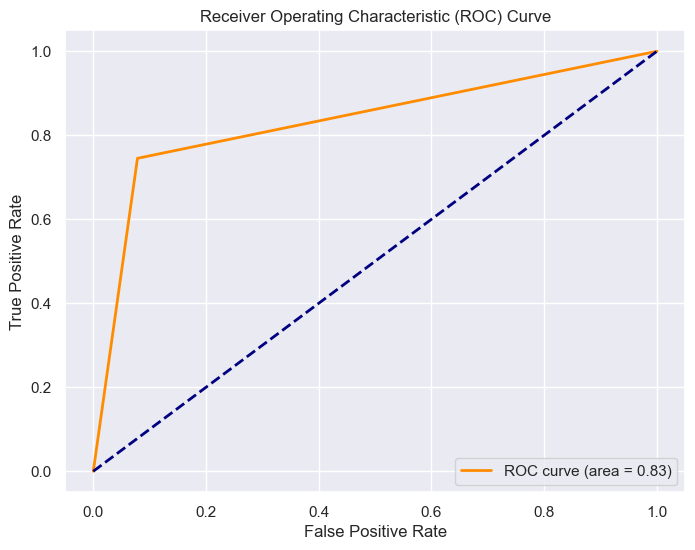

In [71]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
